1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:



# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random



ds = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)

ds.head()



C:\Users\Dennis\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Dennis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [16]:
dummy_default = pd.get_dummies(ds['default'])
dummy_student = pd.get_dummies(ds['student'])

dummy_student.head()


,No,Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [17]:
ds2 = pd.concat([ds['balance'], ds['income'], dummy_student['Yes'], dummy_default['Yes']], axis=1)

ds2.columns=['balance', 'income', 'student', 'default']

ds2.head()

,balance,income,student,default
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,1,0
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


In [18]:
ds2.shape

(10000, 4)

3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

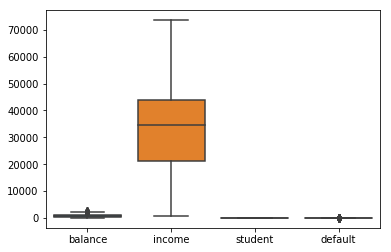

In [19]:
#non standardized data

sns.boxplot(data=ds2)

In [20]:
from sklearn import preprocessing

#standardize data
#reform dataframe

ds_std = preprocessing.scale(ds2)

ds_scaled = pd.DataFrame(ds_std)

ds_scaled.columns=['balance', 'income', 'student', 'default']

#adjust starting point 
ds_scaled.index = np.arange(1, len(ds_scaled)+1) 

ds_scaled.head()


,balance,income,student,default
1,-0.218835,0.813187,-0.645936,-0.185599
2,-0.037616,-1.605496,1.548141,-0.185599
3,0.492410,-0.131212,-0.645936,-0.185599
4,-0.632893,0.164031,-0.645936,-0.185599
5,-0.102791,0.370915,-0.645936,-0.185599


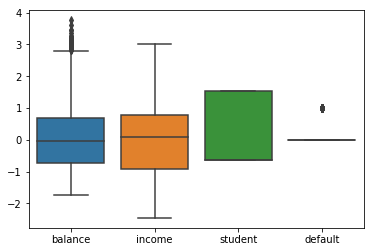

In [21]:
ds3 = pd.DataFrame({'balance':ds_scaled['balance'], 'income':ds_scaled['income'], 'student':ds_scaled['student'], 'default':ds2['default']})

ds3 = ds3[['balance', 'income', 'student', 'default']]

sns.boxplot(data=ds3)


In [22]:
ds3.head()

,balance,income,student,default
1,-0.218835,0.813187,-0.645936,0
2,-0.037616,-1.605496,1.548141,0
3,0.492410,-0.131212,-0.645936,0
4,-0.632893,0.164031,-0.645936,0
5,-0.102791,0.370915,-0.645936,0


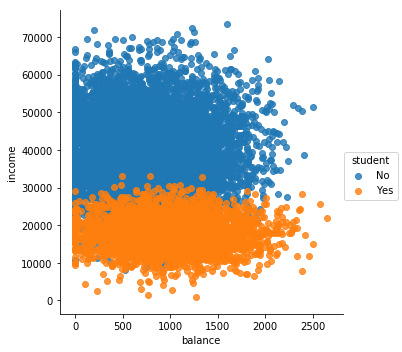

In [23]:
sns.lmplot(x='balance',y='income', data=ds, fit_reg=False, hue='student', legend=True )


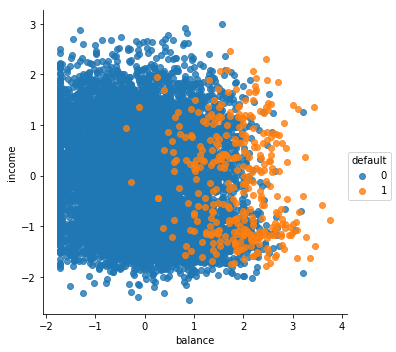

In [24]:
sns.lmplot(x='balance',y='income', data=ds3, fit_reg=False, hue='default', legend=True )

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = ds3['default']
X = ds3.drop(['student','default'],1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train.head()

,balance,income
7141,2.010232,-0.874889
15,0.573907,-0.727867
2734,-0.045236,-1.262422
3043,0.886242,-2.028384
8401,-0.213604,0.443650


In [272]:
y_train.head()

7141    1
15      0
2734    0
3043    0
8401    0
Name: default, dtype: uint8

In [273]:
#train logistic regression with income and balance as variables, no penalty

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy = {:.5f}'.format(logreg.score(X_test, y_test)))


Accuracy = 0.97100


In [274]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#10 fold cross validation for model

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.5f" % (results.mean()))

10-fold cross validation average accuracy: 0.97360


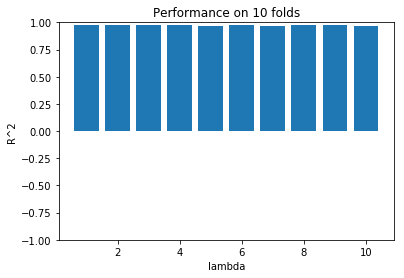

In [275]:
#plot scores over folds

plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 10 folds')
plt.bar(range(1,11),results)
plt.show()

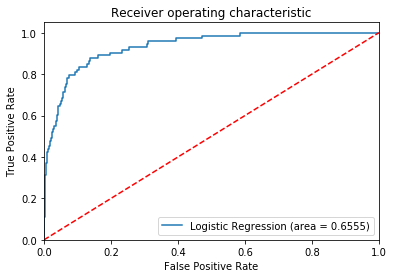

In [276]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#generate AUC ROC
#used roc_auc_score, but does not seem to correlate with actual AUC for curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under the ROC curve : 0.960734


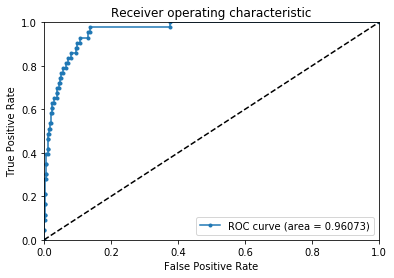

In [277]:
# Computes the AUC ROC of the classifier.
# used code from lecture 5 notebook to compute AUC

def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression)


def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

[(-3, 5),
 Text(0,0.5,'income (std dev)'),
 (-3, 5),
 Text(0.5,0,'balance (std dev)'),
 None]

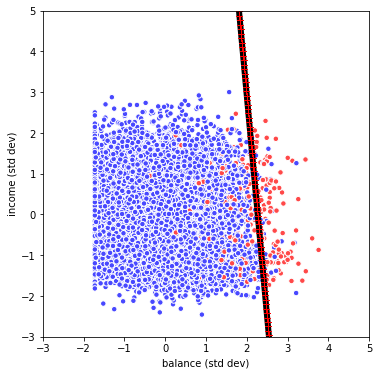

In [278]:
#plot decision boundary on 2D plot


xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)


f, ax = plt.subplots(figsize=(8, 6))

#decision boundary based on threshold p=0.5 
ax.contour(xx, yy, probs, levels=[0.5], cmap="bone", linewidths=6 )

#decision boundary based on intercepts and coefficients
c = logreg.coef_
b = (-logreg.intercept_)/c[0,1]
m = c[0,0]/c[0,1]

yy = b-m*xx
ax.plot(xx, yy, 'r+')

ax.scatter(ds3['balance'], ds3['income'], c=ds3['default'], s=30,
           cmap="bwr", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 5), ylim=(-3, 5),
       xlabel="balance (std dev)", ylabel='income (std dev)')



In [279]:
X_student = ds3.loc[ds3['student'] > 0]

X_student.head()


,balance,income,student,default
2,-0.037616,-1.605496,1.548141,0
6,0.174106,-1.951520,1.548141,0
8,-0.055216,-1.193504,1.548141,0
11,-1.727085,-0.873270,1.548141,0
12,0.796395,-1.518331,1.548141,0


In [281]:
#if we only at data with current students only

y_s = X_student['default']
X_s = X_student.drop(['student','default'],1)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s,y_s, test_size=0.2)

X_s_train.head()

,balance,income
5920,0.146921,-0.663970
3140,1.635878,-1.184417
7265,1.282079,-1.496827
8838,-0.186387,-0.661929
3029,-0.180728,-1.023367


In [282]:
#train logistic regression with income and balance as variables, no penalty

logreg_s = LogisticRegression()
logreg_s.fit(X_s_train, y_s_train)

y_pred_s = logreg_s.predict(X_s_test)

print('Accuracy = {:.5f}'.format(logreg_s.score(X_s_test, y_s_test)))

Accuracy = 0.97284


Area under the ROC curve : 0.932624


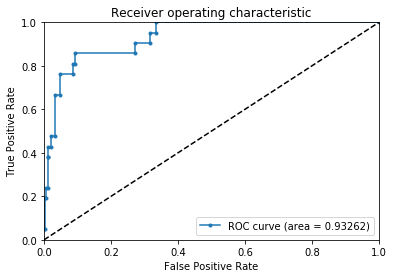

In [283]:
# Generate ROC  
fpr,tpr,roc_auc, thresholds = generate_auc(X_s,y_s,LogisticRegression)
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

[(-3, 1),
 Text(0,0.5,'income (std dev)'),
 (-3, 5),
 Text(0.5,0,'balance (std dev)'),
 None]

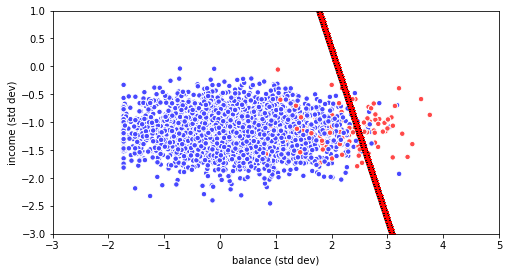

In [284]:
#plot decision boundary on 2D plot

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logreg_s.predict_proba(grid)[:, 1].reshape(xx.shape)


f, ax = plt.subplots(figsize=(8, 6))

#decision boundary based on threshold p=0.5 
ax.contour(xx, yy, probs, levels=[0.5], cmap="bone", linewidths=6 )

#decision boundary based on intercepts and coefficients
c = logreg_s.coef_
b = (-logreg_s.intercept_)/c[0,1]
m = c[0,0]/c[0,1]

yy = b-m*xx
ax.plot(xx, yy, 'r+')

ax.scatter(X_student['balance'], X_student['income'], c=X_student['default'], s=30,
           cmap="bwr", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 5), ylim=(-3, 1),
       xlabel="balance (std dev)", ylabel='income (std dev)')



5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [285]:
X2 = ds3.drop(['default'],1)

X2.head()

,balance,income,student
1,-0.218835,0.813187,-0.645936
2,-0.037616,-1.605496,1.548141
3,0.492410,-0.131212,-0.645936
4,-0.632893,0.164031,-0.645936
5,-0.102791,0.370915,-0.645936


In [289]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=0.2)

X2_train.head()

,balance,income,student
9004,-0.716197,-1.320089,1.548141
7485,0.379158,0.172199,-0.645936
4411,-0.033754,2.106007,-0.645936
8115,0.552536,-1.713040,1.548141
5577,-0.099923,0.956058,-0.645936


In [290]:
y2_train.head()

9004    0
7485    0
4411    0
8115    0
5577    0
Name: default, dtype: uint8

Area under the ROC curve : 0.960033
Area under the ROC curve : 0.960434
Area under the ROC curve : 0.960677
Area under the ROC curve : 0.960820
Area under the ROC curve : 0.960949
Area under the ROC curve : 0.960949
Area under the ROC curve : 0.960949
Area under the ROC curve : 0.960820
Area under the ROC curve : 0.960792
Area under the ROC curve : 0.960777


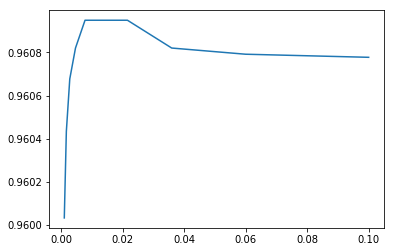

In [291]:
# creating AUC scores from various regularization parameters
alphas = np.logspace(-3,-1,10)
train_errors = list()
test_errors = list()
scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l2')

    # Train the model using the training sets
    regr.fit(X2_train, y2_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)

    
plt.plot(alphas,scores)

In [292]:
i_alpha = np.argmax(scores)
alpha_optim1 = alphas [i_alpha]


print('Optimal alpha (training) = {:.7f} with score of {:.7f}'.format(alpha_optim1, scores[i_alpha]))

Optimal alpha (training) = 0.0077426 with score of 0.9609491


Area under the ROC curve : 0.957140
Area under the ROC curve : 0.957269
Area under the ROC curve : 0.957255
Area under the ROC curve : 0.957326
Area under the ROC curve : 0.957426
Area under the ROC curve : 0.957527
Area under the ROC curve : 0.957613
Area under the ROC curve : 0.957827
Area under the ROC curve : 0.957942
Area under the ROC curve : 0.958271
Area under the ROC curve : 0.958615
Area under the ROC curve : 0.958858
Area under the ROC curve : 0.959102
Area under the ROC curve : 0.959431
Area under the ROC curve : 0.959474
Area under the ROC curve : 0.959889
Area under the ROC curve : 0.959975
Area under the ROC curve : 0.960190
Area under the ROC curve : 0.960462
Area under the ROC curve : 0.960520
Area under the ROC curve : 0.960677
Area under the ROC curve : 0.960691
Area under the ROC curve : 0.960806
Area under the ROC curve : 0.960963
Area under the ROC curve : 0.961021
Area under the ROC curve : 0.961021
Area under the ROC curve : 0.960992
Area under the ROC curve : 0

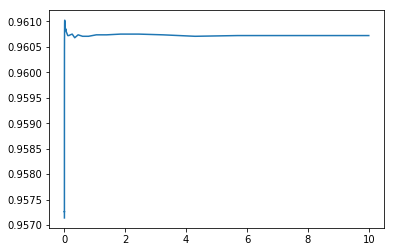

In [293]:
#compute test and train errors over range of regularization parameters

alphas = np.logspace(-5,1,50)
train_errors = list()
test_errors = list()
scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l2')

    # Train the model using the training sets
    regr.fit(X2_train, y2_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
    
    probas_ = regr.predict_proba(X2_train)
    fpr, tpr, thresholds = roc_curve(y2_train, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    train_errors.append(roc_auc)
    
    probas_ = regr.predict_proba(X2_test)
    fpr, tpr, thresholds = roc_curve(y2_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    test_errors.append(roc_auc)
    
plt.plot(alphas,scores)

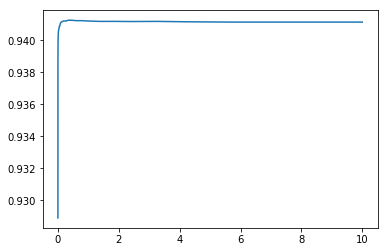

In [294]:
plt.plot(alphas,test_errors)

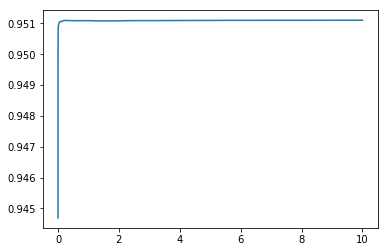

In [295]:
plt.plot(alphas,train_errors)

In [296]:
i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 0.33932217718953295


Text(0,0.5,'Performance')

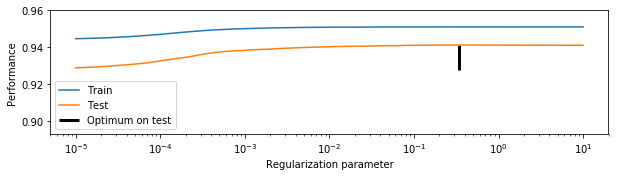

In [297]:
import matplotlib.pyplot as plt

#compute optimum parameter

plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
        linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0.893, 0.96])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


Area under the ROC curve : 0.962281


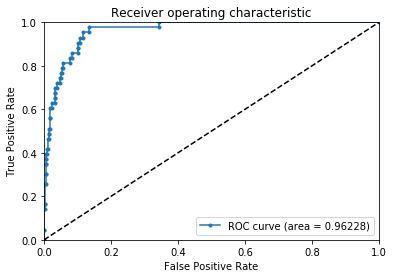

In [298]:
# Generate ROC  for LR with l2 penalty and C=0.1
fpr_2,tpr_2,roc_auc_2, thresholds_2 = generate_auc(X2,y,LogisticRegression,C=alpha_optim,penalty='l2')
    
# Plots ROC
generate_ROCplot(fpr_2,tpr_2,'LR',roc_auc_2)

In [299]:
#log regr object with ridge penalty

logreg2 = LogisticRegression(C=alpha_optim, penalty='l2')
logreg2.fit(X2_train, y2_train)

y_pred_2 = logreg2.predict(X2_test)

print('Accuracy (ridge) = {:.5f}'.format(logreg2.score(X2_test, y2_test)))

Accuracy (ridge) = 0.97700


In [300]:
logreg2.coef_

array([[ 2.3872462 ,  0.03918438, -0.2119192 ]])

In [301]:
X2.columns.values

array(['balance', 'income', 'student'], dtype=object)

In [302]:
df_coef = pd.DataFrame({'feature':X2.columns.values, 'coef':logreg2.coef_[0]})

coef_sorted = df_coef.sort_values(by='coef', ascending =False)

coef_sorted

,coef,feature
0,2.387246,balance
1,0.039184,income
2,-0.211919,student


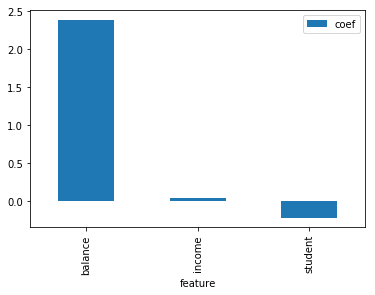

In [303]:
#feature importance by coefficient size

plt.figure(figsize=(15,4
                    ))

coef_sorted[::1].plot(x='feature', y='coef',kind='bar')

In [304]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


#plotting scatter with axes3D

xx2, yy2 = np.mgrid[-5:5:.01, -5:5:.05]

#decision boundary based on intercepts and coefficients
c_bal = logreg2.coef_[0,0]
c_inc = logreg2.coef_[0,1]
c_std = logreg2.coef_[0,2]

b2 = (logreg2.intercept_)
m2 = c_bal/c_inc
normal = (c_bal, c_inc, c_std)

z = (-normal[0]*xx2 - normal[1]*yy2 - b2)*1./normal[2]



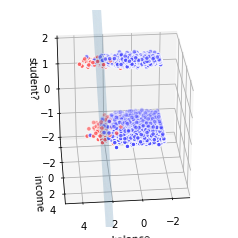

In [306]:
#set up 3D plot
plt3d = plt.figure().gca(projection ='3d')

#plot scatter
plt3d.scatter (ds3['balance'], ds3['income'], ds3['student'], c=ds3['default'], s=20,
           cmap="bwr", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt3d.set(aspect="equal",
       xlim=(-3, 5), ylim=(-3, 5), zlim=(-2,2),
       xlabel="balance", ylabel='income', zlabel='student')

plt3d.set_xlabel('balance')
plt3d.set_ylabel('income')
plt3d.set_zlabel('student?')

#plot surface
plt3d.plot_surface(xx2,yy2,z,alpha=0.2)

plt3d.view_init(azim=85)


In [307]:
xx2, yy2 = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx2.ravel(), yy2.ravel()]

#probs2 = logreg2.predict_proba(grid)[:, 1].reshape(xx2.shape)

#decision boundary based on threshold p=0.5 
#ax.contour(xx2, yy2, probs2, levels=[0.5], cmap="bone", vmin=0, vmax=0.6)


#decision boundary based on intercepts and coefficients

b2 = (-logreg2.intercept_)/c_inc
m2 = c_bal/c_inc

yy2 = b2-m2*xx2



[(-3, 5), Text(0,0.5,'income'), (-3, 5), Text(0.5,0,'balance'), None]

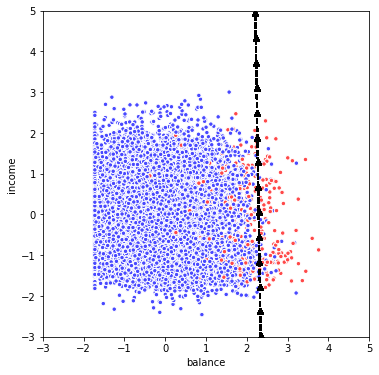

In [308]:
#decision boundary, with student variable added

f, ax = plt.subplots(figsize=(8, 6))

ax.plot(xx2, yy2, '--k^')

ax.scatter(ds3['balance'], ds3['income'], c=ds3['default'], s=20,
           cmap="bwr", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 5), ylim=(-3, 5),
       xlabel="balance", ylabel='income')

In [309]:
yy2.shape

(1000, 1000)

In [310]:
print('Adding student as additional variable does not increase dramatically the accuracy rate of the logistic regression')

Adding student as additional variable does not increase dramatically the accuracy rate of the logistic regression


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

In [311]:
#10 fold cross validation

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(C=alpha_optim, penalty='l2')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X2, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.5f" % (results.mean()))

10-fold cross validation average accuracy: 0.97320


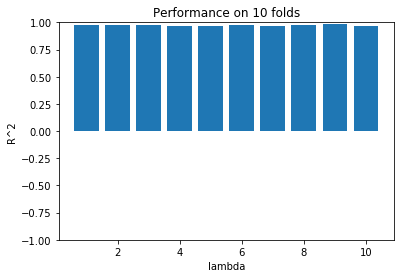

In [312]:
#plot scores over folds

plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 10 folds')
plt.bar(range(1,11),results)
plt.show()

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [313]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import seaborn
%matplotlib inline

# Fit regression model
tree_0 = DecisionTreeClassifier(max_depth=1)
tree_1 = DecisionTreeClassifier(max_depth=2)
tree_2 = DecisionTreeClassifier(max_depth=5)
tree_0.fit(X2_train, y2_train)
tree_1.fit(X2_train, y2_train)
tree_2.fit(X2_train, y2_train)

# Predict
y_0 = tree_0.predict(X2_test)
y_1 = tree_1.predict(X2_test)
y_2 = tree_2.predict(X2_test)

Automatically created module for IPython interactive environment


In [314]:
y_0

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [315]:
print ("Accuracy with max depth 1 is {:.7f}".format(tree_0.score(X2_test, y2_test)))
print ("Accuracy with max depth 3 is {:.7f}".format(tree_1.score(X2_test, y2_test)))
print ("Accuracy with max depth 5 is {:.7f}".format(tree_2.score(X2_test, y2_test)))

Accuracy with max depth 1 is 0.9730000
Accuracy with max depth 3 is 0.9760000
Accuracy with max depth 5 is 0.9745000


In [316]:
print('Accuracy is robust with tree depths of 1, 3, and 5.')
print('The accuracy is comparable with logistic regression used earlier.')

Accuracy is robust with tree depths of 1, 3, and 5.
The accuracy is comparable with logistic regression used earlier.


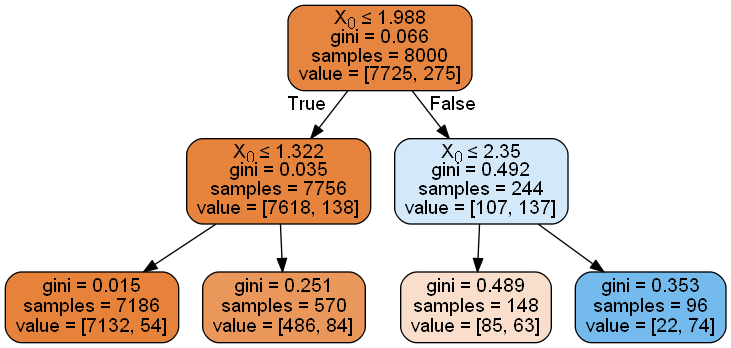

In [317]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

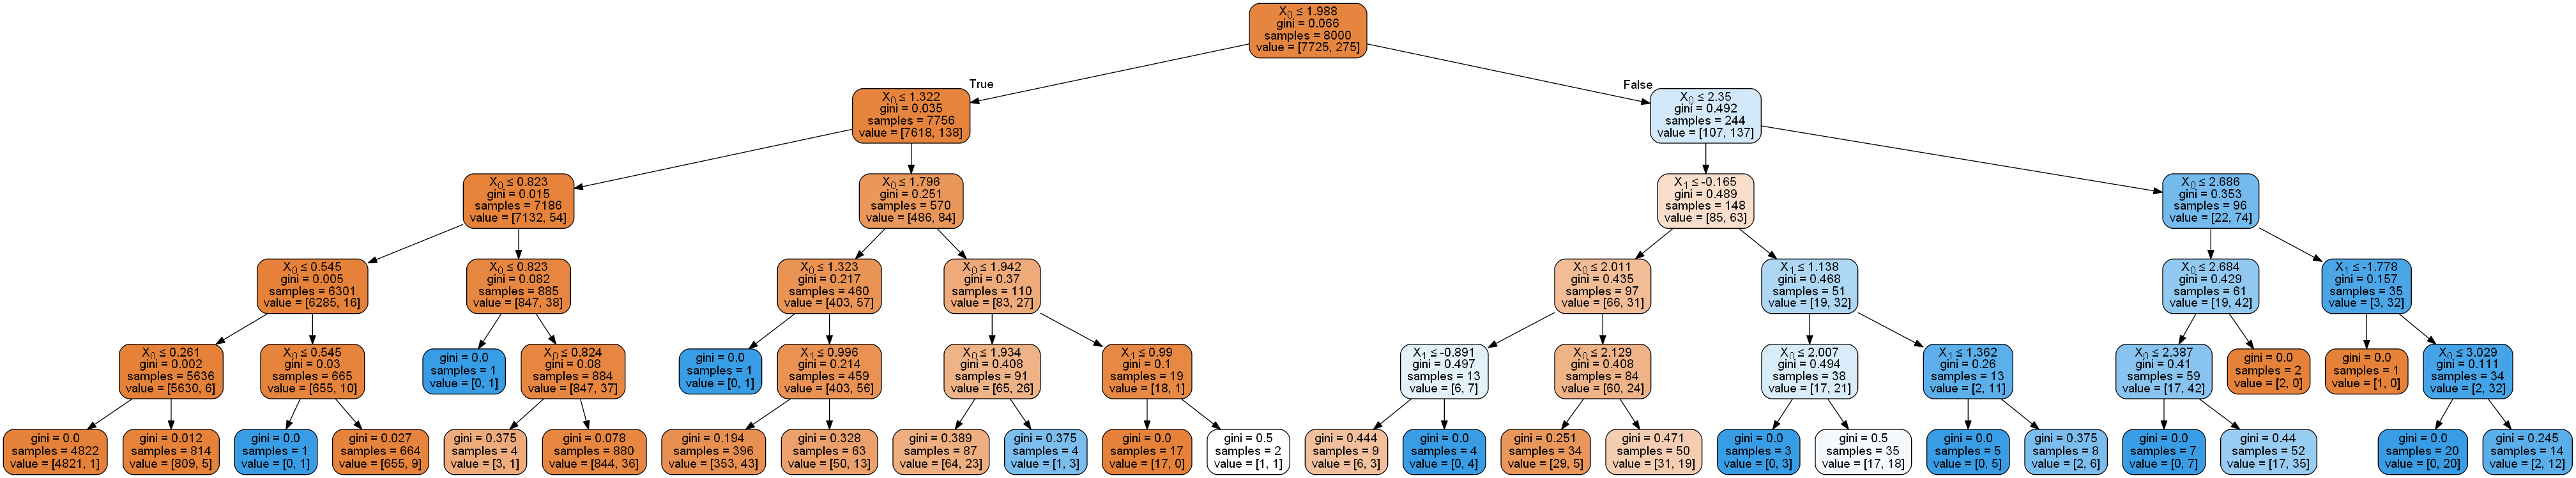

In [318]:
dot_data = StringIO()
export_graphviz(tree_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [319]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

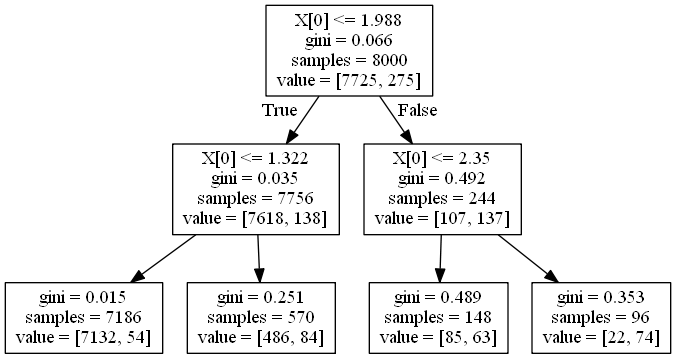

In [320]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt=DecisionTreeClassifier(max_depth=5)
visualize_tree(tree_1, feature_names=['x'])

dot_data=export_graphviz(tree_1, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

8) Find the optimal decision tree depth and compute the AUC ROC. 

In [321]:
depth = range(1,30)
train_errors = list()
test_errors = list()

for d in depth:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X2_train, y2_train)

    # Train the model using the training sets    
    probas_ = tree.predict_proba(X2_train)
    fpr, tpr, thresholds = roc_curve(y2_train, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    train_errors.append(roc_auc)
    
    probas_ = tree.predict_proba(X2_test)
    fpr, tpr, thresholds = roc_curve(y2_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    test_errors.append(roc_auc)
    


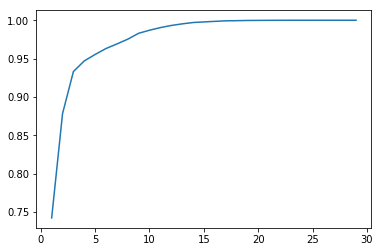

In [322]:
plt.plot(depth,train_errors)

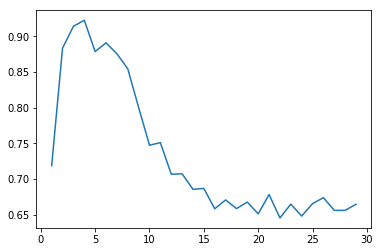

In [323]:
plt.plot(depth,test_errors)

In [324]:
i_depth_optim = np.argmax(test_errors)
depth_optim = depth[i_depth_optim]
print("Optimal tree depth is {} with performance of {:.5f} " .format(depth_optim, test_errors[i_depth_optim]))

Optimal tree depth is 4 with performance of 0.92242 


Text(0,0.5,'ROC AUC')

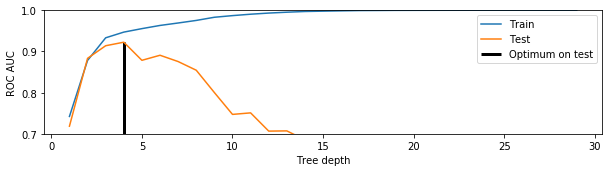

In [325]:
plt.figure(figsize=(10,5))
plt.subplot(2, 1, 1)
plt.plot(depth, train_errors, label='Train')
plt.plot(depth, test_errors, label='Test')
plt.vlines(depth_optim, plt.ylim()[0], np.max(test_errors), color='k',
        linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([0.70, 1])
plt.xlabel('Tree depth')
plt.ylabel('ROC AUC')


In [326]:
print('Testing over a range of max depths, the depth of 5 had the highest test performance for ROC AUC. It is lower than the highest test performance from previous logistic regression. The drop in test performance as depth increased is due to overfitting of training data')

Testing over a range of max depths, the depth of 5 had the highest test performance for ROC AUC. It is lower than the highest test performance from previous logistic regression. The drop in test performance as depth increased is due to overfitting of training data
